# Part 1 - Exploratory Data Analysis and Data Cleaning 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [82]:
dfP1 = pd.read_csv("plant1_power.csv")
dfP2 = pd.read_csv("plant2_power.csv")
dfW1 = pd.read_csv("plant1_weather.csv")
dfW2 = pd.read_csv("plant2_weather.csv")

#1. Importing the data into data frames. 
# dfP1 = Plant 1 - Power; dfP2 - Plant 2 - Power; dfW1 - Plant 1 - Weather; dfW2 - Plant 2 - Weather. 

In [83]:
dfP1["DAILY_YIELD"].mean()

3295.968737182587

In [84]:
dfP2["DAILY_YIELD"].mean()

3294.8902951797813

In [85]:
dfW1["AMBIENT_TEMPERATURE"].mean()

25.531605717564393

In [86]:
dfW2["AMBIENT_TEMPERATURE"].mean()

28.06939988232112

In [87]:
dfP1["TOTAL_YIELD"].mean()

6978711.76067105

In [88]:
dfP2["TOTAL_YIELD"].mean()

658944788.4237648

In [89]:
#2. The highest average power yield is plant 1, highest temperature average is plant 2, and the highest total yield average is plant 1.

In [90]:
#3a. Standardizing the date and time for all data frames.

dfP1["DATE_TIME"] = pd.to_datetime(dfP1["DATE_TIME"],dayfirst = True)
dfP2["DATE_TIME"] = pd.to_datetime(dfP2["DATE_TIME"],dayfirst = True)
dfW1["DATE_TIME"] = pd.to_datetime(dfW1["DATE_TIME"],yearfirst = True)
dfW2["DATE_TIME"] = pd.to_datetime(dfW2["DATE_TIME"],yearfirst = True)

In [91]:
#3b. Merging plant and weather data frames; df1 = Plant 1 and df2 = Plant 2.

df1 = dfP1.merge(right = dfW1, how = 'left', on = 'DATE_TIME') 

df2 = dfP2.merge(right = dfW2, how = 'left', on = 'DATE_TIME') 

In [92]:
#4. Check for any NA values.

df1.isna().sum()

# There are 4 rows that return NaN in the first plant.

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             4
SOURCE_KEY_y           4
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64

In [93]:
df2.isna().sum() 
# running this does not give us any NaN numbers.

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [94]:
# Dropping the NaN rows for the first plant.

df1 = df1.dropna()

# There is still plenty of data to work with as only 4 rows were dropped.

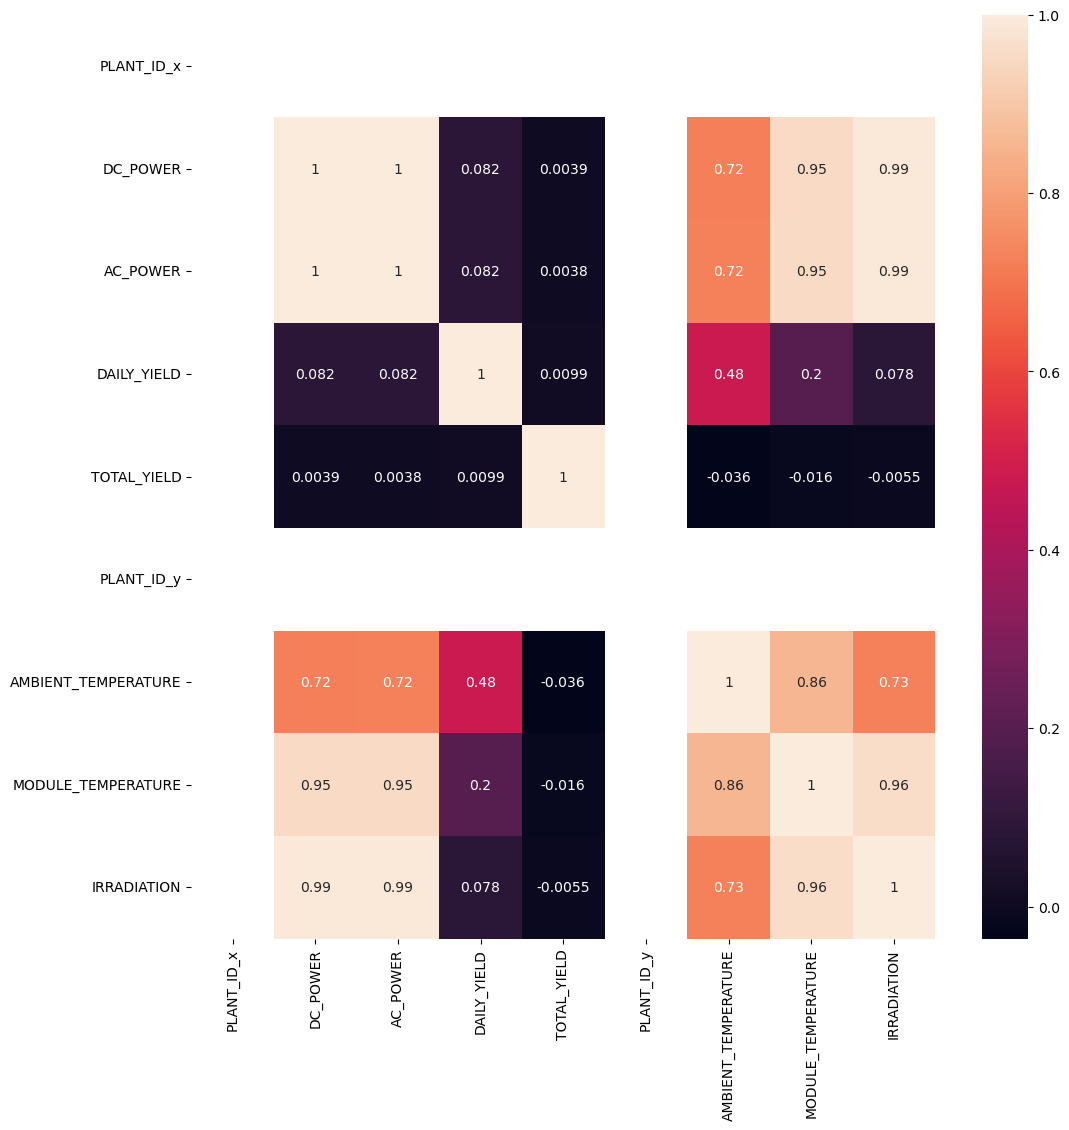

In [95]:
# The strongest correlation between two features are between the DC_POWER and Irradiation columns.

fig = plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True)
plt.show()

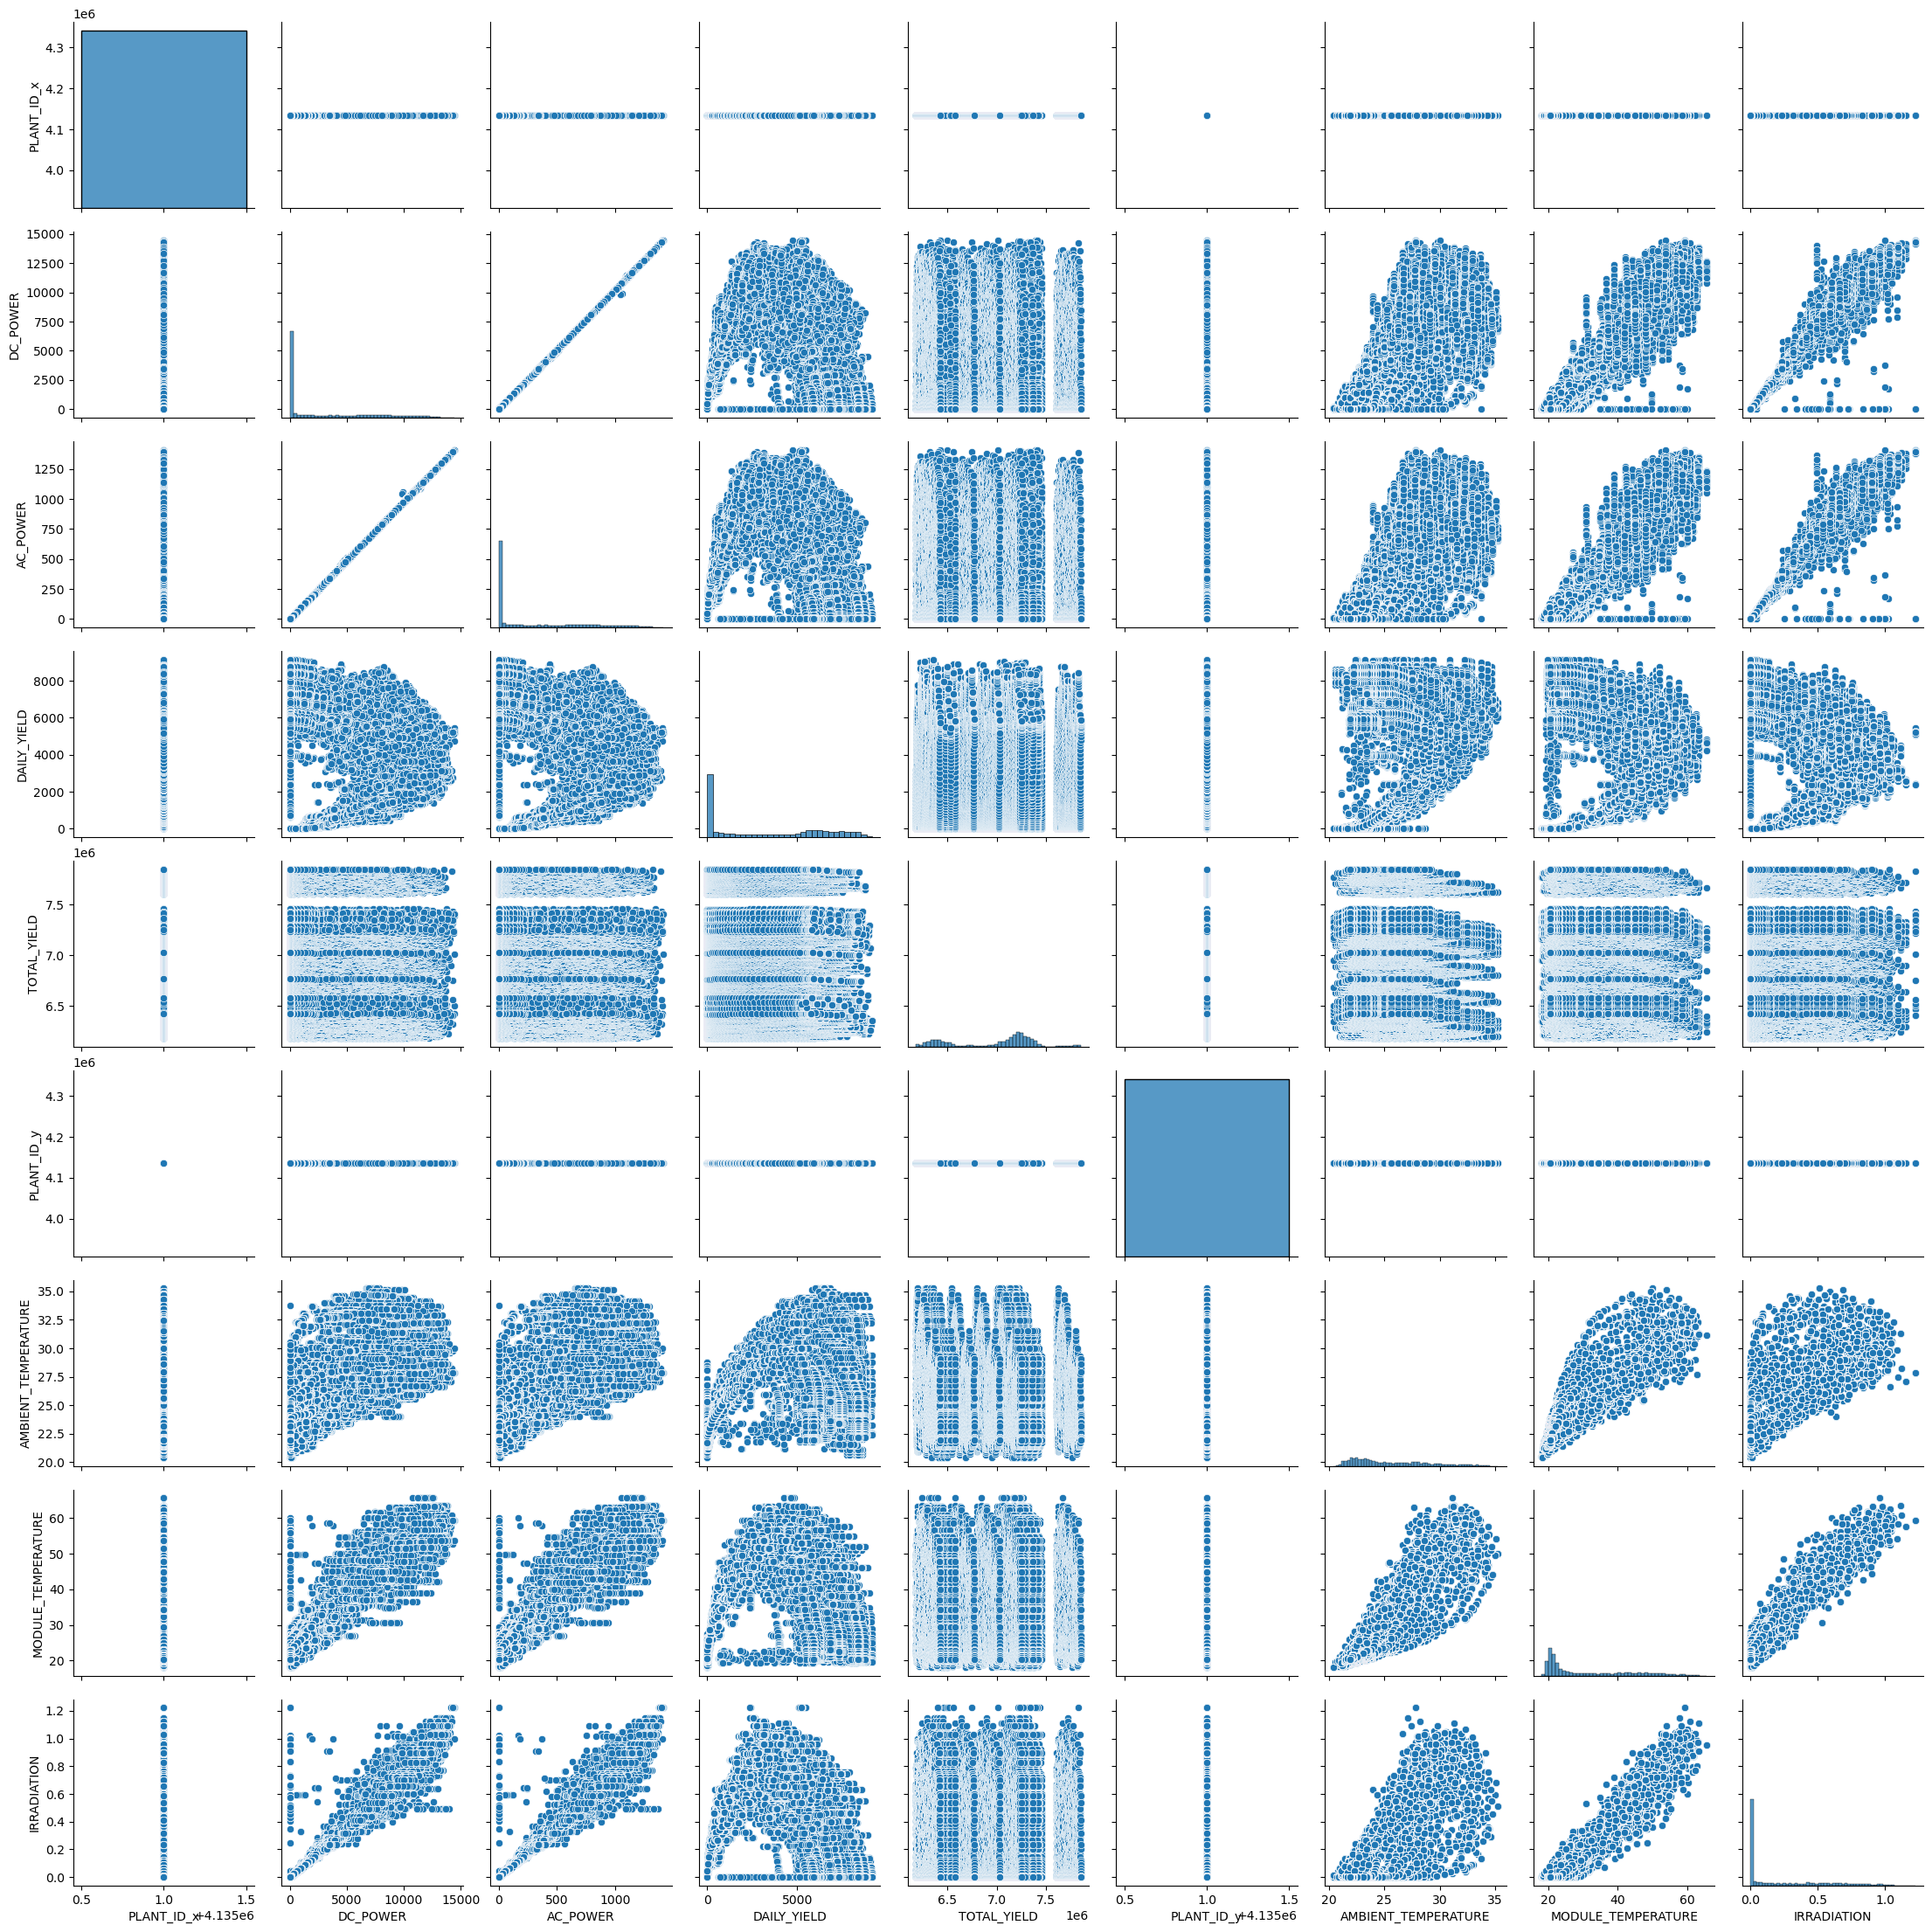

In [96]:
#6. The features that seem linearly correlated are: DC_POWER and AC_POWER; 
sns.pairplot(df1)
plt.show()

# Part 2 – Simple Linear Regression Model Training and Analysis

In [97]:
#1. 
from sklearn.model_selection import train_test_split

In [98]:
#1a. Creating two arrays
x = df1[["AMBIENT_TEMPERATURE"]]
y = df1["DC_POWER"]

In [130]:
#1b. Test Size 30%
# We do this because we don't want to capture all the data as it may cause an overabundance of outliers leading to inaccuracies and overfitting.
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [131]:
#1c
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [132]:
#1d.
from sklearn.metrics import r2_score

print(r2_score(y_pred1, y_test))

# R^2

0.08700437223752067


Text(0, 0.5, 'Residual')

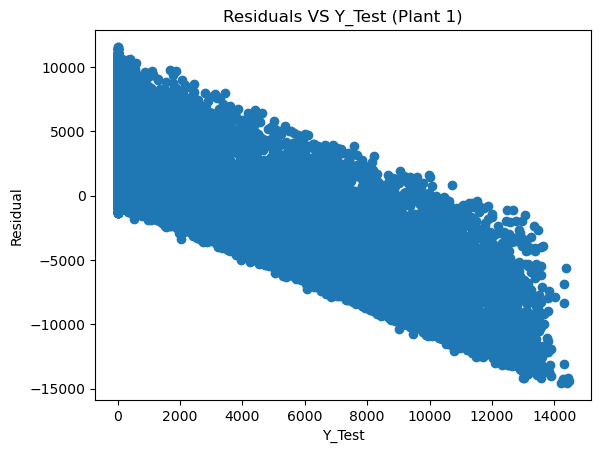

In [151]:
#1e. Residuals

plant1Resi = (y_pred1 - y_test)

plt.scatter(y_test, plant1Resi)

plt.title("Residuals VS Y_Test (Plant 1)")
plt.xlabel("Y_Test")
plt.ylabel("Residual")

#The spread is close to each other and clustered toghther. 
#We can only go on observatopn, but since the data points are close to each other, the validity of the model is okay without any numbers to go off od.

In [134]:
#1f.
print(model.score(x_train, y_train))

# The R^2 are not similar as 0.5 is not close to 0.1. We did not avoid overfitting with this model.

0.5251964044982951


In [154]:
#2.

x2 = df1[["IRRADIATION"]]
y2 = df1["DC_POWER"]

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.3)

model2 = LinearRegression()
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

In [155]:
#2a. R^2 value
print(r2_score(y_pred2, y_test))

# R^2 value of 0.9770441190293703

0.9788196017691784


Text(0, 0.5, 'Residual')

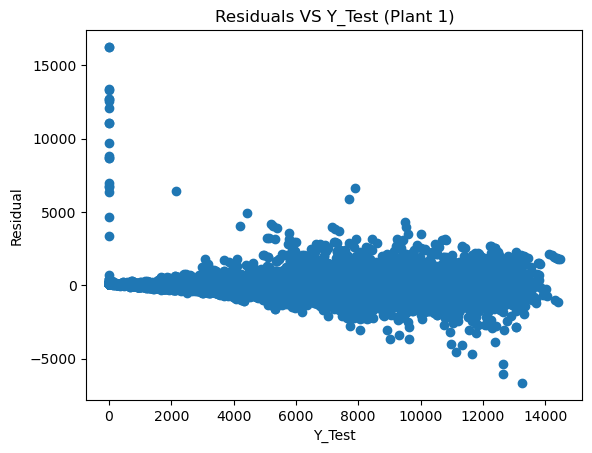

In [156]:
#2b.
plant1Resi2 = (y_pred2 - y_test)

plt.scatter(y_test, plant1Resi2)

plt.title("Residuals VS Y_Test (Plant 1)")
plt.xlabel("Y_Test")
plt.ylabel("Residual")

# The spread is a lot more erratic with "irradiation" and there are more outliers as well. There is low validity in this data.

In [157]:
#2c.
print(model2.score(x_train, y_train))

# Overfitting was avoided as the r^2 value is close to the predictive value. 

0.9787566427811596


In [158]:
#3. Irradiation is a better predictor for DC_output than Ambient Temperature as the r^2 score is more closely related between the training data and predictive values.
# Hoever, the spread shown with Ambient Temperature is also more conjoined and closer together than the Irradiation spread.
# Validity is higher in Ambient Temperature than in Irradiation.

# Part 3 – Improving the Model with Multiple Linear Regression and Cross Validation 

In [159]:
#1. Two features
x3 = df1[["AMBIENT_TEMPERATURE", "IRRADIATION"]]
y3 = df1["DC_POWER"]

x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.3)

model3 = LinearRegression()
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

print(r2_score(y_pred3, y_test))
print(model3.score(x_train, y_train))

0.9796736935642131
0.978502798303545


In [160]:
#2. Three features
x4 = df1[["AMBIENT_TEMPERATURE", "IRRADIATION", "MODULE_TEMPERATURE"]]
y4 = df1["DC_POWER"]

x_train, x_test, y_train, y_test = train_test_split(x4, y4, test_size = 0.3)

model4 = LinearRegression()
model4.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)

print(r2_score(y_pred4, y_test))
print(model4.score(x_train, y_train))

0.9797950925039582
0.9785639784066147


In [161]:
# Using more columns/features increased the predictive power and R^2 scores.
# We can utilize these models to predicst solar power outputs as more data being collected will be able to validate predictions and looking at their graphs will be able to help as well.
# Some more applications that can use models to predict are datasets pertaining to surveys, the medical field may use it to find a correlation between a drug's affects and the dosage amount that is needed.

In [168]:
#3. Cross Validation
from sklearn.model_selection import cross_val_score

x5 = df1[["AMBIENT_TEMPERATURE", "IRRADIATION", "MODULE_TEMPERATURE"]]
y5 = df1["DC_POWER"]

x_train, x_test, y_train, y_test = train_test_split(x5, y5, test_size = 0.3)


model5 = LinearRegression()
model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)

print(cross_val_score(model5, x_train, y_train, scoring = 'r2', cv = 5))

[0.98197124 0.97374788 0.98287276 0.97645798 0.97968348]


In [185]:
# The r^2 scores are all similar in value and are all positive numbers close to one indicating a high validiation and good prediction.

# Part 4 – Non-Linear Regression 

In [169]:
#1a. The pair pllot showed "Daily Yield" as a non-linear plot (not moving in a straight diagonal line), so I don't think it linear regression would work.

In [170]:
#1b.
x6 = df1[["AMBIENT_TEMPERATURE", "IRRADIATION"]]
y6 = df1["DAILY_YIELD"]

x_train, x_test, y_train, y_test = train_test_split(x6, y6, test_size = 0.3)

model6 = LinearRegression()
model6.fit(x_train, y_train)

y_pred6 = model6.predict(x_test)

print(r2_score(y_pred6, y_test))
print(model6.score(x_train, y_train))

-0.5996330473823301
0.3819872683184524


In [182]:
# The r^2 score is negative for the predictive and the training prediction is positive close to 0 meaning that linear regression did not work well for predictiing "Daily Yield".
# This matches up the pair plot as it is not in a linear fashion.

In [183]:
#1c. Might not have done this correctly. I was not sure how to transform the data using (-x^2 + x)
df1["NORMAL_DAILY_YIELD"] = (df1["DAILY_YIELD"]/df1["DAILY_YIELD"].max())

In [184]:
#1d. Predicting "Daily Yield" is harder than "DC Power" as the yield can change on different instances and is dependent on a lot of factors.
# DC Power is constant so it makes sense for it have a linear data set.

# Part 5 – Diagnosing Inefficiencies in the Power Plant 

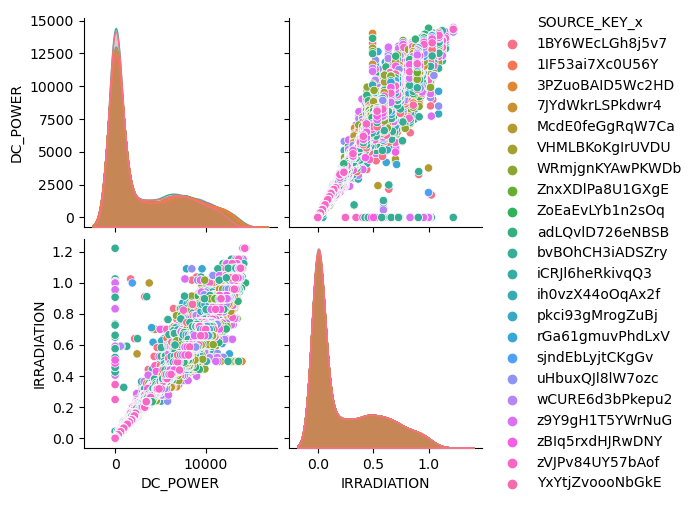

In [187]:
#1a. 
sns.pairplot(df1[["DC_POWER", "IRRADIATION", "SOURCE_KEY_x"]], hue = "SOURCE_KEY_x")
plt.show()

# "DC_POWER" and "IRRADIATION" has several NAN data point within the x-axis/y-axis. DC POWER should not be zero as long as there is Irradiation.

In [212]:
#1b. 0 is Normal and 1 is Failure.
df1["condition"] = 0

for ind in df1.index:
    if df1["DC_POWER"] == 0 & df1["IRRADIATION"] >= 0.2:
        df1["condition"] == 1
    else:
        df1["condition"] == 0
        
df1["condition"].value_counts()

# The number of failures, the dates on which they occurred, and which sensors are at fault...
# An error occurs, not sure how to fix it

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [213]:
#2. 0 is Normal and 1 is Failure.
df2["condition"] = 0

for ind in df1.index:
    if df2["DC_POWER"] == 0 & df2["IRRADIATION"] >= 0.2:
        df2["condition"] == 1
    else:
        df2["condition"] == 0
        
df2["condition"].value_counts()

#The number of faults are...
# Same as the previous question.

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

# Part 6 – Final Write Up  

In [ ]:
# This data set has been analyzed using linear disgression and it showcases how we can predict the power output of our solar panels.
# The data can be manipulated in a way to accurately showcase which variables/features heavily affect the power output.
# As long as we a linear plot, and both r^2 score values align, it is able to be determined as an accurate prediction.
# We can analyze the data and its predictions using overfitting and how to correct it as well to receive more accurate graphs.
# The number of features used in predicting may be cross validated to see whether or not they contribute to the solar power output. 
# Some features like the "Daily Yield" may not be utilized in linear regression due to its nonlinear nature, but can be manipulated to perform predictions with using the maximum and quadratic equation.
# We have also seen inverters impacting the performance of power plant and can check which ones are causing the issue.
# We can count how many failures occur, how to identify the sensors, and on which days they occurred. 
# Overall the power plant is running smooth, after eliminating all failures and identifying where the non-zero values occur in the power plant.